In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [2]:
# Function to load TensorBoard logs
def load_tensorboard_logs(logdir):
    event_acc = EventAccumulator(logdir)
    event_acc.Reload()

    # Extracting Scalars
    data = {}
    for tag in event_acc.Tags()['scalars']:
        events = event_acc.Scalars(tag)
        values = [event.value for event in events]
        steps = [event.step for event in events]
        data[tag] = (steps, values)
    
    return data

In [3]:
# Define the log directories (You can add multiple directories for different environments)
log_dirs = {
    "QuadrotorXHoverEnv": "logs/log_QuadrotorXHoverEnv-v0/PPO_2",
    "TiltrotorPlus8DofHoverEnv": "logs/log_TiltrotorPlus8DofHoverEnv-v0/PPO_2",
    "QuadrotorPlusHoverEnv": "logs/log_QuadrotorPlusHoverEnv-v0/PPO_2"
}

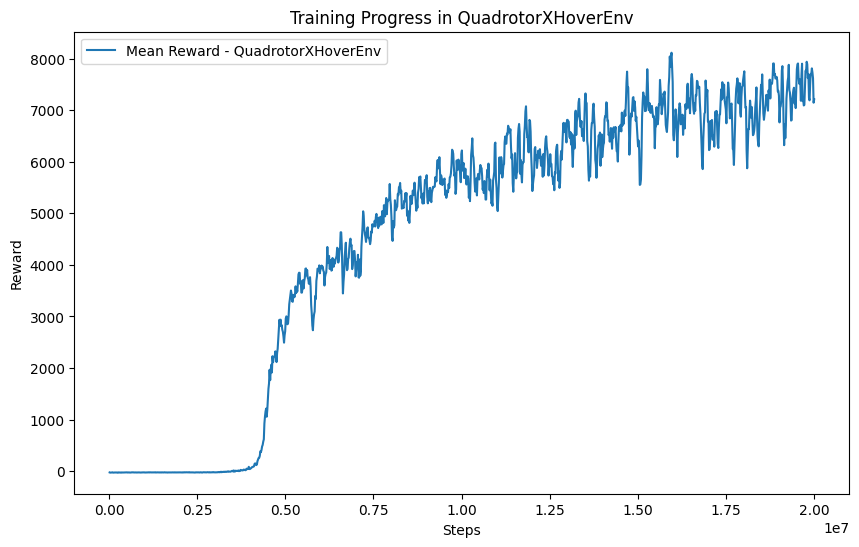

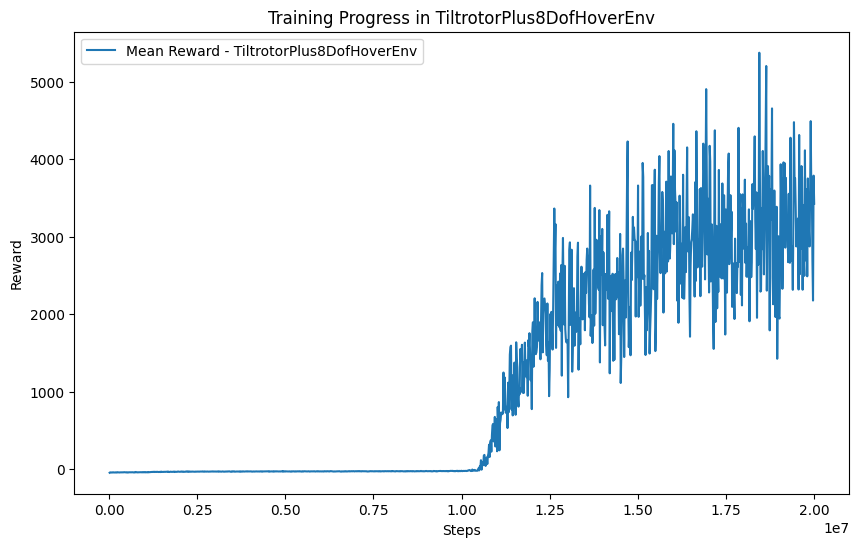

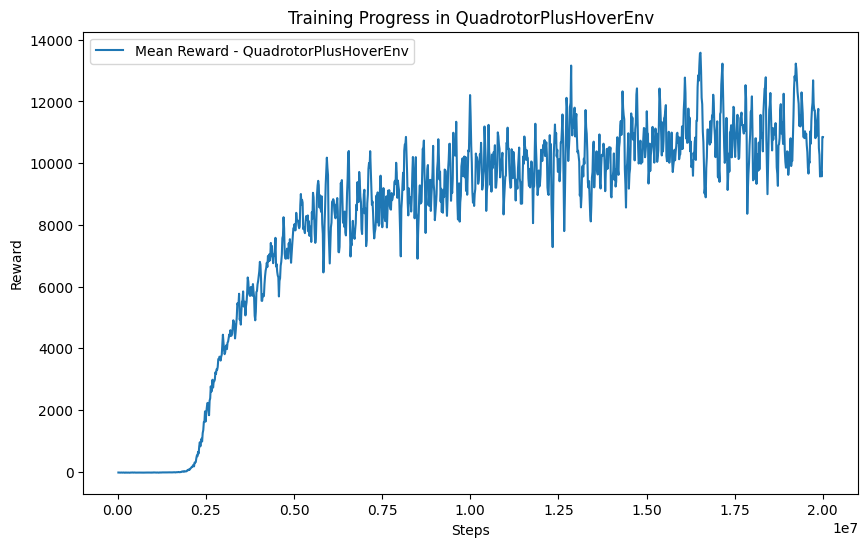

In [4]:
# Load logs and plot
for env_name, log_dir in log_dirs.items():
    logs = load_tensorboard_logs(log_dir)
    # Assuming 'episode_reward' is the tag for mean reward
    steps, rewards = logs['rollout/ep_rew_mean']
    plt.figure(figsize=(10, 6))
    plt.plot(steps, rewards, label=f"Mean Reward - {env_name}")
    plt.xlabel('Steps')
    plt.ylabel('Reward')
    plt.title(f'Training Progress in {env_name}')34.6 34.6 
    plt.legend()
    plt.show()

In [5]:
import gym
from stable_baselines3 import PPO
import numpy as np
import pandas as pd
import gym_multirotor

# Load your trained agent and environment
env_name = 'TiltrotorPlus8DofHoverEnv-v0'  # Replace with your environment name
model = PPO.load(f"./policy/PPO_{env_name}")
env = gym.make(env_name)

# Data collection
state_action_pairs = []

num_episodes = 100  # Set the number of episodes for data collection
for _ in range(num_episodes):
    observation = env.reset()
    done = False
    while not done:
        action, _states = model.predict(observation, deterministic=True)
        state_action_pairs.append(np.hstack((observation, action)))
        observation, reward, done, info = env.step(action)

# Convert to DataFrame for easier analysis
data = pd.DataFrame(state_action_pairs)


ValueError: Error: Unexpected observation shape (26,) for Box environment, please use (22,) or (n_env, 22) for the observation shape.

In [16]:
print(env.observation_space.shape)
print(env.action_space.shape)

(22,)
(8,)
